Live Code # 3

In [3]:
# load in libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# load the data

set_config(transform_output="pandas")

sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


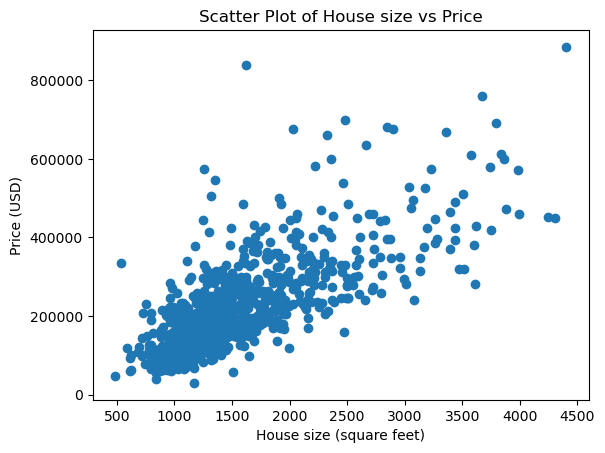

In [5]:
# plot the data 

# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

In [6]:
# set seed to ensure reproducibility (same 30 listings)

np.random.seed(10)
small_sacramento = sacramento.sample(n = 30)
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
486,7540 HICKORY AVE,ORANGEVALE,95662,CA,3,1,1456,Residential,Thu May 15 00:00:00 EDT 2008,225000,38.703056,-121.235221
399,9013 CASALS ST,SACRAMENTO,95826,CA,2,1,795,Condo,Mon May 19 00:00:00 EDT 2008,126960,38.557045,-121.371670
233,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276
549,2901 PINTAIL WAY,ELK GROVE,95757,CA,4,3,3070,Residential,Tue May 20 00:00:00 EDT 2008,495000,38.398488,-121.473424
43,191 BARNHART CIR,SACRAMENTO,95835,CA,4,2,2605,Residential,Fri May 16 00:00:00 EDT 2008,257200,38.675594,-121.515878
181,8316 NORTHAM DR,ANTELOPE,95843,CA,3,2,1235,Residential,Fri May 16 00:00:00 EDT 2008,246544,38.720767,-121.376678
250,2130 CATHERWOOD WAY,SACRAMENTO,95835,CA,3,2,1424,Residential,Mon May 19 00:00:00 EDT 2008,251000,38.675506,-121.510987
140,620 KESWICK CT,GRANITE BAY,95746,CA,4,3,2356,Residential,Fri May 16 00:00:00 EDT 2008,600000,38.732096,-121.219142
392,8593 DERLIN WAY,SACRAMENTO,95823,CA,3,2,1436,Residential,Mon May 19 00:00:00 EDT 2008,180000,38.447585,-121.426627


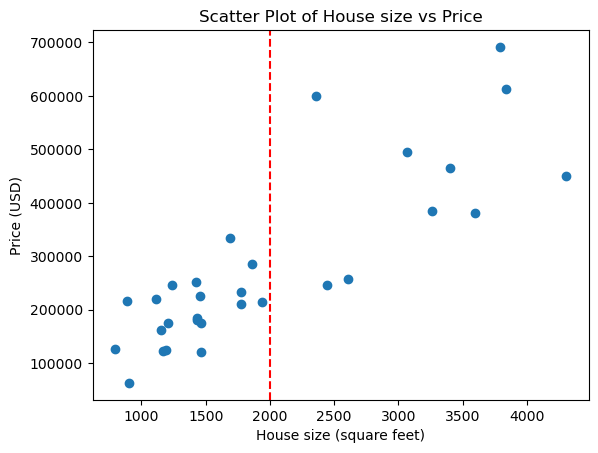

In [7]:
# plotting the 30 listings

# Plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')

plt.show()

In [ ]:
# new col dist reps distance of each house fromm 2000 sq ft house
small_sacramento["dist"] = (2000 - small_sacramento["sq__ft"]).abs() # subtract 2000 sq ft from all houses in the set

In [ ]:
# find 5 nearest neighbs (most similar in size to our target)
nearest_neighbors = small_sacramento.nsmallest(5, "dist") # find the nearest 5 neighbs, based on whose sq ft - 2000 is smallest (i.e. if our house is 2000, a house of 2030 - 2000 will give a smaller result than a 4600 - 2000 one does, so just finding who has very little suqare footage over 2000)
nearest_neighbors

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
280,3228 I ST,SACRAMENTO,95816,CA,4,3,1939,Residential,Mon May 19 00:00:00 EDT 2008,215000,38.573844,-121.462839,61
197,8986 HAFLINGER WAY,ELK GROVE,95757,CA,3,2,1857,Residential,Fri May 16 00:00:00 EDT 2008,285000,38.397923,-121.450219,143
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276,224
599,5340 BIRK WAY,SACRAMENTO,95835,CA,3,2,1776,Residential,Tue May 20 00:00:00 EDT 2008,234000,38.672495,-121.515251,224
786,8025 PEERLESS AVE,ORANGEVALE,95662,CA,2,1,1690,Residential,Wed May 21 00:00:00 EDT 2008,334150,38.711470,-121.216214,310


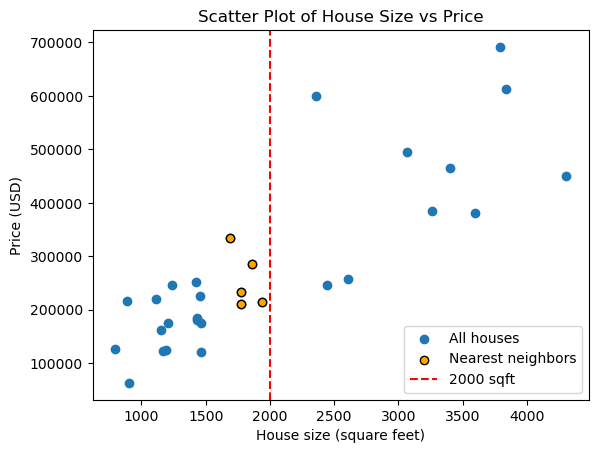

In [12]:
# plot this 5 nearest set

# Scatter plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

In [14]:
# prediction not based on an informed K decision, but spits out a prediction based on that choice
prediction = nearest_neighbors["price"].mean()
prediction

255630.0

Building a Model, Splitting Dataset

In [19]:
sacramento_train, sacramento_test = train_test_split(sacramento, train_size = 0.75, random_state = 42, shuffle = True)

In [ ]:
# split training data into X and y

X_train = sacramento_train[["sq__ft"]] # said something about why we have double brackets here but I missed it, something about arrays and dataframes
y_train = sacramento_train["price"]

In [18]:
# initialize our model
knn_regressor = KNeighborsRegressor()

In [20]:
param_grid = {
    "n_neighbors" : range(1,201,2) # start #, end # (up to not inclu), skip by (reduces computational load by not checking everything, but chekcking enough)
}

In [ ]:
# initialize our grid search

sacr_gridsearch = GridSearchCV(
    estimator = knn_regressor, 
    param_grid = param_grid, # our nneighbs range
    cv = 5, # # of folds
    scoring = "neg_root_mean_squared_error" #GridSearchCV by default maximizes scores; with RPMSE, smaller scores are better - the negative helps us balance this
    #scoring = "r2" # alt option
)

In [24]:
# fit our grid search to our model (using training data)
sacr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 2)},
             scoring='neg_root_mean_squared_error')

In [25]:
results = pd.DataFrame(sacr_gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011995,0.012750,0.003996,0.002280,1,{'n_neighbors': 1},-111432.646994,-124930.376771,-111553.640165,-121189.571040,-110534.126317,-115928.072257,5952.545896,100
1,0.003797,0.002398,0.002997,0.000893,3,{'n_neighbors': 3},-83821.916808,-104955.785525,-103625.843369,-91717.493848,-103903.764636,-97604.960837,8421.343712,99
2,0.004397,0.001496,0.003399,0.001020,5,{'n_neighbors': 5},-83283.327050,-96834.764478,-96911.317517,-91292.686449,-95632.090469,-92790.837192,5177.675751,67
3,0.002597,0.000489,0.002800,0.000749,7,{'n_neighbors': 7},-82055.054082,-94969.980001,-97268.515757,-88221.977923,-90245.964227,-90552.298398,5335.745149,48
4,0.004197,0.001166,0.004398,0.001743,9,{'n_neighbors': 9},-79689.453587,-93181.815029,-95366.182188,-85141.340410,-88929.960501,-88461.750343,5624.014989,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003798,0.000746,0.005597,0.001021,191,{'n_neighbors': 191},-89915.825545,-104295.596404,-111208.653645,-98904.525240,-78649.766768,-96594.873521,11356.361492,94
96,0.002598,0.000489,0.005809,0.000970,193,{'n_neighbors': 193},-90255.812044,-104469.469062,-111371.637819,-99100.345423,-78654.579110,-96770.368691,11388.795184,95
97,0.003798,0.001939,0.005996,0.001095,195,{'n_neighbors': 195},-90530.555942,-104502.552728,-111646.266694,-99378.081722,-78724.182181,-96956.327853,11421.964676,96
98,0.002398,0.000490,0.007207,0.002216,197,{'n_neighbors': 197},-90670.217434,-104604.161357,-111723.663538,-99637.489840,-78857.575222,-97098.621478,11408.163601,97


In [ ]:
# ONLY FOR RMPSE 
# need to remove the negative on the mean_test_score for results
results["mean_test_score"] = results["mean_test_score"].abs()
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011995,0.012750,0.003996,0.002280,1,{'n_neighbors': 1},-111432.646994,-124930.376771,-111553.640165,-121189.571040,-110534.126317,115928.072257,5952.545896,100
1,0.003797,0.002398,0.002997,0.000893,3,{'n_neighbors': 3},-83821.916808,-104955.785525,-103625.843369,-91717.493848,-103903.764636,97604.960837,8421.343712,99
2,0.004397,0.001496,0.003399,0.001020,5,{'n_neighbors': 5},-83283.327050,-96834.764478,-96911.317517,-91292.686449,-95632.090469,92790.837192,5177.675751,67
3,0.002597,0.000489,0.002800,0.000749,7,{'n_neighbors': 7},-82055.054082,-94969.980001,-97268.515757,-88221.977923,-90245.964227,90552.298398,5335.745149,48
4,0.004197,0.001166,0.004398,0.001743,9,{'n_neighbors': 9},-79689.453587,-93181.815029,-95366.182188,-85141.340410,-88929.960501,88461.750343,5624.014989,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003798,0.000746,0.005597,0.001021,191,{'n_neighbors': 191},-89915.825545,-104295.596404,-111208.653645,-98904.525240,-78649.766768,96594.873521,11356.361492,94
96,0.002598,0.000489,0.005809,0.000970,193,{'n_neighbors': 193},-90255.812044,-104469.469062,-111371.637819,-99100.345423,-78654.579110,96770.368691,11388.795184,95
97,0.003798,0.001939,0.005996,0.001095,195,{'n_neighbors': 195},-90530.555942,-104502.552728,-111646.266694,-99378.081722,-78724.182181,96956.327853,11421.964676,96
98,0.002398,0.000490,0.007207,0.002216,197,{'n_neighbors': 197},-90670.217434,-104604.161357,-111723.663538,-99637.489840,-78857.575222,97098.621478,11408.163601,97


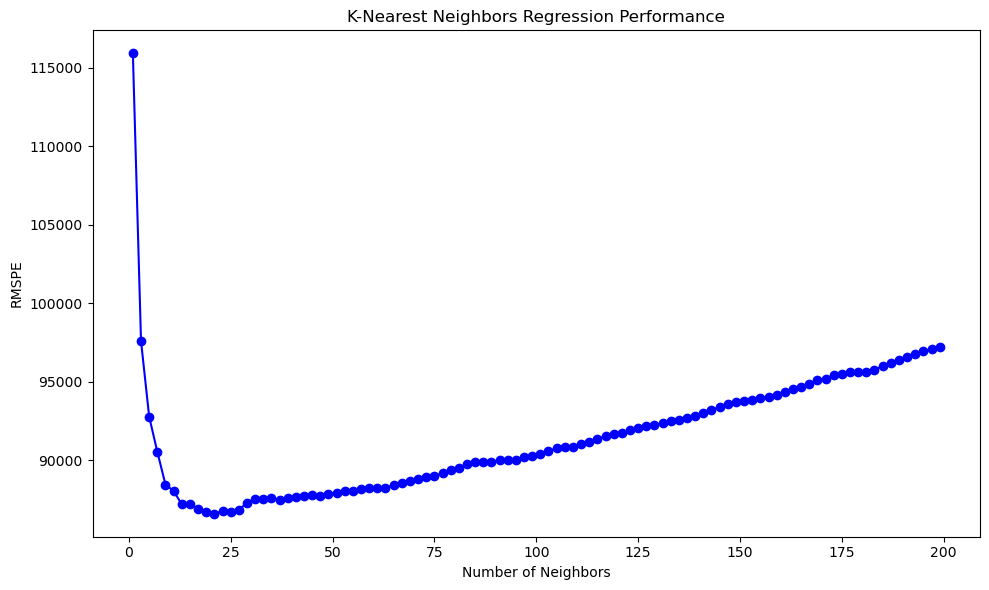

In [27]:
#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSPE')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [ ]:
# best k value determined using training set
sacr_gridsearch.best_params_

{'n_neighbors': 21}

Make Predictions Using the Test Set

In [ ]:
# make predictions on the test set

sacramento_test["predicted"] = sacr_gridsearch.predict(sacramento_test[["sq__ft"]])

rmspe = mean_squared_error(
    y_true = sacramento_test["price"], # actual price
    y_pred = sacramento_test["predicted"]
)**(1/2)

"""RMSPE 
First we find average, then subtract our x from average,
Some values will be negative and some will be positive deviation from the mean
So to avoid summing to zero, we square it 
The we take square root to equalize that

We use RMSE because that equation is differentiable, We use that in gradient descent later on, squaring also penalizes large  errors. MSE is great for outliers.
"""

rmspe # amount we can expect the response variable (price) to deviate from the prediction

73381.83726315352

In [ ]:
r2 = r2_score(
    y_true = sacramento_test["price"], # actual price
    y_pred = sacramento_test["predicted"]
)

r2 # coefficient of determination, how much variance in our response variable is explained by our predictor
# 50% of variance in house price can be explained by house size 

0.5068721427126693

c:\Users\Andrea\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


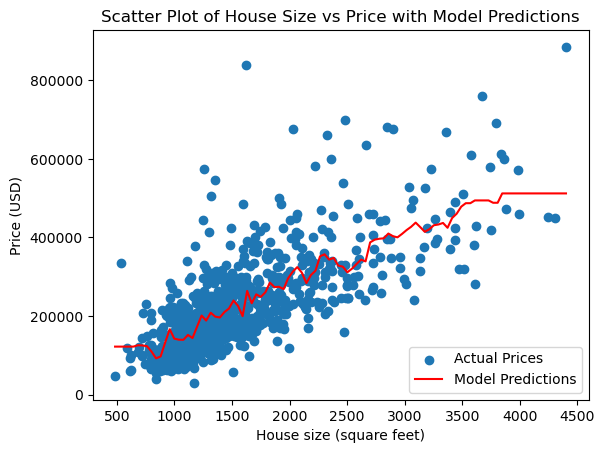

In [ ]:
# Visualization of predictors from our final model

# Generate a range of house sizes for prediction
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show();